In [ ]:
#import libries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings("ignore")
import time
import math


**DATA ENTRY AND DATA PRE-PROCESSING**

In [ ]:
#entry the given data
df=pd.read_csv('/content/data1.csv',header=None)

#normalised the data
for column in df.columns[0:3]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())

#slicing the data
X=df.iloc[:,:-1]
Y=(df.iloc[:,-1].values)
Y2=Y.reshape(-1,1)
X2 = np.c_[np.ones((X.shape[0],1)), X]
total_rows=len(X2)

#divided the data into training and testing data
train_rows=int(0.8*total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X2_train = X2[train_indices, :]
Y2_train = Y2[train_indices, :]

# Create the testing set by excluding the training indices
X2_test = np.delete(X2, train_indices, axis=0)
Y2_test = np.delete(Y2, train_indices, axis=0)

In [ ]:
df

,0,1,2
0,0.102041,0.632653,1.0
1,0.510204,0.775510,1.0
2,0.020408,0.755102,1.0
3,0.489796,0.775510,1.0
4,0.040816,0.693878,1.0
...,...,...,...
195,0.938776,0.326531,0.0
196,0.469388,0.530612,0.0
197,0.346939,0.346939,0.0
198,0.367347,0.122449,0.0


**COST FUNCTION**

In [ ]:
# define cost_function
def sigmoid(t):
  return 1/(1+np.exp(-t))

#define the cost function
def cost_fnc(W,X2,Y2):
  pred=sigmoid(X2.dot(W))

 # calculate J(w)
  cost=-(np.sum(Y2*np.log(pred)+(1-Y2)*np.log(1-pred)))

  return cost



In [ ]:
#Batch gradient descent


def grad_desc_fnc(X2,Y2,W,alpha):
  m=X2.shape[1] #number of attributes
  n=X2.shape[0] #number of observation
  iter=100000

  cost_iter=np.zeros(iter)
  W_iter=np.zeros((iter,m))

  for i in range (iter):
    h=sigmoid(np.dot(X2,W))
    W=W - (alpha/n)*(X2.T.dot((h-Y2)))
    W_iter[i,:]=W.T
    cost_iter[i]=cost_fnc(W,X2,Y2)
  return W,cost_iter,W_iter,iter




In [ ]:
def Logis(x,y,alpha):
  m=x.shape[1]
  W=np.zeros((m,1))
  W, cost_iter, W_iter, iter = grad_desc_fnc(x, y, W, alpha)

  return W,cost_iter,W_iter,iter

In [ ]:
alpha =.01  # This is my chosen learning rate
W, cost_iter, W_iter, iter = Logis(X2_train, Y2_train, alpha)

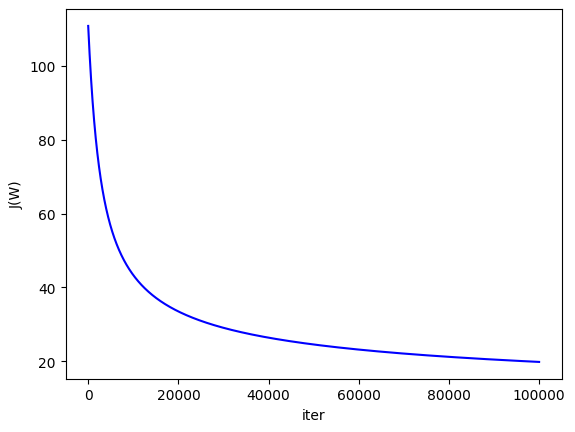

In [ ]:
plt.plot(range(iter),cost_iter,color='blue')
plt.xlabel('iter')
plt.ylabel('J(W)')
plt.show()

In [ ]:
#calculate W.T*X_i to see the class
pred_list=[]
for i in range (len(X2_train)):
  pred_list.append(W.T.dot(X2_train[i]))
#pred_list

In [ ]:
#divide in two class(positive and negative)
class_list=[]
for i in range(len(pred_list)):
  if(pred_list[i]>=0):
    class_list.append(1)
  else:
    class_list.append(0)
#class_list


In [ ]:
#calculate true_positive,true_negative ,false_positive,false_negative
TP=0
TN=0
FN=0
FP=0
for i in range(len(Y2_train)):
  # if(y2_train[i] == 1 and class_list[i]==1)
  if(Y2_train[i]==class_list[i]==1):
    TP+=1
  elif(Y2_train[i]==class_list[i]==0):
    TN+=1
  elif(Y2_train[i]==1 and class_list[i]==0):
    FN+=1
  elif(Y2_train[i]==0 and class_list[i]==1):
    FP+=1
print('True_positive=',TP)
print('True_negative=',TN)
print('False_negative=',FN)
print('False_positive=',FP)



True_positive= 79
True_negative= 76
False_negative= 0
False_positive= 5


# **PERFORMANCE MEASUREMENT**

**1(a)Report sensitivity, specificity, precision and F measure**

In [ ]:
#Accuracy
Accuracy=(TP+TN)/(TP+TN+FP+FN)
#sensitivity
sensitivity=TP/(TP+FN)
#specificity
specificity=TN/(TN+FP)
#precision
precision=TP/(TP+FP)
#F_measure
F_measure=(2*precision*sensitivity)/(precision+sensitivity)
print('Accuracy of the model is=',Accuracy)
print('sensitivity of the model is=',sensitivity)
print('specificaty of the model is=',specificity)
print('precision of the model is= ',precision)
print('F_measure of the model is=',F_measure)

Accuracy of the model is= 0.96875
sensitivity of the model is= 1.0
specificaty of the model is= 0.9382716049382716
precision of the model is=  0.9404761904761905
F_measure of the model is= 0.9693251533742331


In [ ]:
thre_list=[0,0.1,0.2,0.3,0.4,0.5,0.9]
def class_hist(thresold):
  TP=0
  TN=0
  FN=0
  FP=0
  class_list=[]
  for i in range (len(pred_list)):
      if(pred_list[i]>=thresold):
        class_list.append(1)
      else:
        class_list.append(0)

  return class_list

class_lists=[]



for thresold in thre_list:
  class_list=class_hist(thresold)
  class_lists.append(class_list)


TP = 0
TN = 0
FN = 0
FP = 0

#createing two empty list to store sensitivity and specificaty
True_positive_rate=[] #sensitivity
False_positive_rate=[] #false_positive_rate=1-specificiaty

for j in range(len(class_lists)):
    for i in range(len(Y2_train)):
        if Y2_train[i] == 1 and class_lists[j][i] == 1:
            TP += 1
        elif Y2_train[i] == 0 and class_lists[j][i] == 0:
            TN += 1
        elif Y2_train[i] == 1 and class_lists[j][i] == 0:
            FN += 1
        elif Y2_train[i] == 0 and class_lists[j][i] == 1:
            FP += 1

    #Accuracy
    Accuracy=(TP+TN)/(TP+TN+FP+FN)
    #sensitivity
    sensitivity=TP/(TP+FN)
    True_positive_rate.append(sensitivity)

    #specificity
    specificity=TN/(TN+FP)
    False_positive_rate.append(1-specificity)

    #precision
    precision=TP/(TP+FP)
    #F_measure
    F_measure=(2*precision*sensitivity)/(precision+sensitivity)
    print('Accuracy of the model is=',Accuracy)
    print('sensitivity of the model is=',sensitivity)
    print('specificaty of the model is=',specificity)
    print('precision of the model is= ',precision)
    print('F_measure of the model is=',F_measure)

Accuracy of the model is= 0.96875
sensitivity of the model is= 1.0
specificaty of the model is= 0.9382716049382716
precision of the model is=  0.9404761904761905
F_measure of the model is= 0.9693251533742331
Accuracy of the model is= 0.96875
sensitivity of the model is= 1.0
specificaty of the model is= 0.9382716049382716
precision of the model is=  0.9404761904761905
F_measure of the model is= 0.9693251533742331
Accuracy of the model is= 0.9729166666666667
sensitivity of the model is= 1.0
specificaty of the model is= 0.9465020576131687
precision of the model is=  0.948
F_measure of the model is= 0.973305954825462
Accuracy of the model is= 0.9734375
sensitivity of the model is= 0.9936708860759493
specificaty of the model is= 0.9537037037037037
precision of the model is=  0.9544072948328267
F_measure of the model is= 0.9736434108527131
Accuracy of the model is= 0.97375
sensitivity of the model is= 0.9873417721518988
specificaty of the model is= 0.9604938271604938
precision of the model i

# **ROC CURVE**

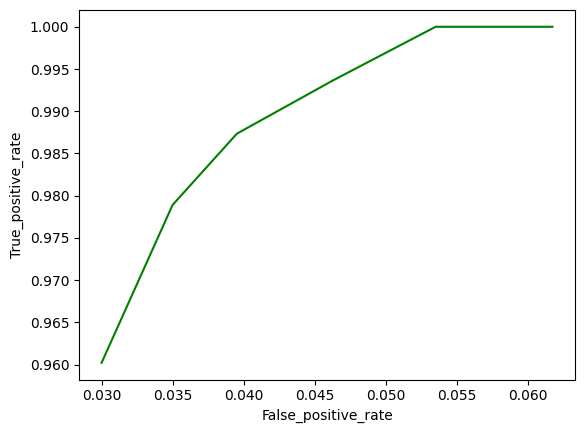

In [ ]:
#plot of the ROC curve
plt.plot(False_positive_rate,True_positive_rate,color='green')
plt.xlabel('False_positive_rate')
plt.ylabel('True_positive_rate')
plt.show()

# **DECISION BOUNDARY**

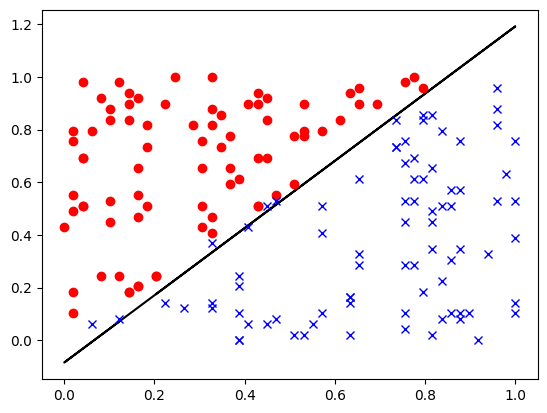

In [ ]:
#decision boundary
x1=X2_train[::,1]

x2=-(W[0]+W[1]*x1)/W[2]

#plotting the decision boundary
plt.plot(x1,x2,c='black')
for i in range(len(X2_train)):
  if Y2_train[i][0]==1:
    plt.plot(X2_train[i,1],X2_train[i,2],c='red',marker='o')
  else:
    plt.plot(X2_train[i,1],X2_train[i,2],c='blue',marker='x')


# **SIGMOID FUNCTION**

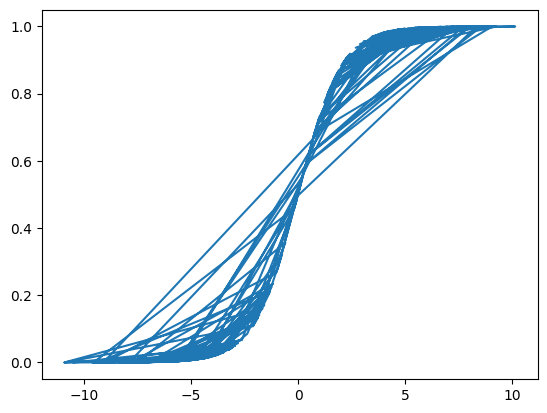

In [ ]:
y_pre=X2.dot(W)
p=sigmoid(X2.dot(W))

plt.plot(y_pre,p)


# **PARAMETERS VALUE**

In [ ]:
#report the values of the parameters of the final model
print('values of the parameter=',W)

values of the parameter= [[  0.84851109]
 [-12.7846926 ]
 [ 10.01557348]]


In [ ]:
#second order optimization technique in the case of logistic regression


def Newtons_fnc(X2,Y2,W,alpha):
  m=X2.shape[1] #number of attributes
  n=X2.shape[0] #number of observation
  iter=100000

  cost_iter=np.zeros(iter)
  W_iter=np.zeros((iter,m))

  for i in range (iter):
    h=sigmoid(np.dot(X2,W))
    #calculate hessian matrix
    hessian = (alpha / n) * (X2.T.dot(np.diag(np.multiply(h,(1 - h).reshape(-1,1)))).dot(X2))

    update_term = (alpha/n) * (X2.T.dot(h - Y2))
    #print("Shape of update_term:", update_term.shape)
    W = W - np.linalg.inv(hessian) * update_term


    #W=W - np.linalg.inv(hessian) *((alpha/n)*(X2.T.dot(h-Y2)))
    W_iter[i,:]=W.T
    cost_iter[i]=cost_fnc(W,X2,Y2)
  return W,cost_iter,W_iter,iter

In [ ]:
def Logis(x,y,alpha):
  m=x.shape[1]
  W=np.zeros((m,1))
  W, cost_iter, W_iter, iter = Newtons_fnc(x, y, W, alpha)

  return W,cost_iter,W_iter,iter

In [ ]:
#alpha =.01  # This is my chosen learning rate
#Y2_train=Y2_train.reshape(-1,1)
#W, cost_iter, W_iter, iter = Logis(X2_train, Y2_train, alpha)

In [ ]:
W

array([[  0.55687744],
       [-12.65515435],
       [ 10.14781816]])

**Multi_class Logistic Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/arrhythmia_csv.csv', header=None,skiprows=1)
df.dropna()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
8,44,0,168,56,84,118,354,160,63,61,...,0.0,7.0,-1.3,0.0,0.0,0.6,2.1,12.5,30.9,1
29,51,1,160,83,96,147,400,301,82,-37,...,0.0,7.3,-3.9,0.0,0.0,0.5,-1.1,3.6,-6.3,2
56,38,1,160,63,79,0,376,165,0,34,...,0.0,10.1,0.0,0.0,0.0,0.0,1.5,26.2,37.0,1
71,37,0,182,90,101,294,356,164,143,33,...,0.0,6.9,0.0,0.0,0.0,0.2,1.9,22.0,38.3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,35,1,160,53,55,163,340,162,102,40,...,0.0,8.7,-0.5,0.0,0.0,0.5,2.3,20.9,40.6,1
430,11,0,138,29,123,145,361,221,80,112,...,-3.4,19.6,-4.2,0.0,0.0,0.2,1.8,12.2,25.1,10
440,37,0,176,72,88,153,389,172,89,67,...,-0.9,16.6,-3.4,0.0,0.0,0.7,1.8,24.9,41.4,1
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2


In [ ]:
#normalised the data
for column in df.columns[0:279]:
  df[column]=(df[column] - df[column].min()) / (df[column].max() - df[column].min())

# Slicing the data
X = df.iloc[:, :-1]
Y = df.iloc[:, -1].values
Y = Y.reshape(-1, 1)
X = np.c_[np.ones((X.shape[0], 1)), X]

# Define the number of classes
num_classes = len(np.unique(Y))

# Divided the data into training and testing data
total_rows = len(X)
train_rows = int(0.8 * total_rows)

# Generate random indices for the training set
train_indices = np.random.choice(total_rows, train_rows, replace=False)

# Create the training set
X_train = X[train_indices, :]
Y_train = Y[train_indices, :]

# Create the testing set by excluding the training indices
X_test = np.delete(X, train_indices, axis=0)
Y_test = np.delete(Y, train_indices, axis=0)



In [ ]:
# Define sigmoid function
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

# Define cost function for multiclass logistic regression
def cost_fnc(W, X, Y, epsilon=1e-10):
    m = X.shape[1]  # number of attributes
    n = X.shape[0]  # number of observations
    cost = 0

    for c in range(num_classes):
        y_c = (Y == c).astype(int)  # Convert to binary vector for the current class
        h = sigmoid(np.dot(X, W[c, :]))
        h = np.clip(h, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid extreme values
        cost += np.sum(y_c * np.log(h) + (1 - y_c) * np.log(1 - h))

    cost = -cost
    return cost


# Gradient descent for multiclass logistic regression
def grad_desc_fnc(X, Y, W, alpha):
    m = X.shape[1]  # number of attributes
    n = X.shape[0]  # number of observations
    iter = 1000

    cost_iter = np.zeros(iter)
    W_iter = np.zeros((iter, num_classes, m))

    for i in range(iter):
        for c in range(num_classes):
            y_c = (Y == c).astype(int)
            h = sigmoid(np.dot(X, W[c, :]))
            W[c, :] = W[c, :] - (alpha / n) * (X.T.dot((h - y_c[:,0])))

        W_iter[i, :, :] = W
        cost_iter[i] = cost_fnc(W, X, Y)

    return W, cost_iter, W_iter, iter

# Initialize weights for each class
initial_weights = np.zeros((num_classes, X.shape[1]))

alpha=0.01
# Run multiclass logistic regression
W, cost_iter, W_iter, iter = grad_desc_fnc(X_train, Y_train, initial_weights, alpha)

# Plot the cost over iterations


In [ ]:
cost_iter

In [ ]:
# Define cost function for multiclass logistic regression
def cost_fnc(W, X, Y, epsilon=1e-5):
    m = X.shape[1]  # number of attributes
    n = X.shape[0]  # number of observations
    cost = 0

    for c in range(num_classes):
        y_c = (Y == c).astype(int)  # Convert to binary vector for the current class
        h = sigmoid(np.dot(X, W[c, :]))
        h = np.clip(h, epsilon, 1 - epsilon)  # Clip predicted probabilities to avoid extreme values
        cost += np.sum(y_c * np.log(h) + (1 - y_c) * np.log(1 - h))

    cost = -cost / n
    return cost

# Gradient descent for multiclass logistic regression
def grad_desc_fnc(X, Y, W, alpha, num_iters):
    m = X.shape[1]  # number of attributes
    n = X.shape[0]  # number of observations


    cost_iter = np.zeros(num_iters)
    W_iter = np.zeros((num_iters, num_classes, m))

    for i in range(num_iters):
        for c in range(num_classes):
            y_c = (Y == c).astype(int)
            h = sigmoid(np.dot(X, W[c, :]))
            W[c, :] = W[c, :] - (alpha / n) * (X.T.dot((h - y_c[:,0])))

        W_iter[i, :, :] = W
        cost_iter[i] = cost_fnc(W, X, Y)

    return W, cost_iter, W_iter,iter

# Initialize weights for each class
initial_weights = np.zeros((num_classes, X.shape[1]))

alpha=0.0000001
num_iters=10000
# Run multiclass logistic regression
W, cost_iter, W_iter, iter = grad_desc_fnc(X_train, Y_train, initial_weights, alpha,num_iters)





In [ ]:
cost_iter

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/arrhythmia_csv.csv', header=None,skiprows=1)
df=df.dropna()
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalizing the data
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])

# Slicing the data
Y = df.iloc[:, -1].values

# Dividing the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')

# Train the model
model.fit(X_train, Y_train)

# Now you can use the trained model to make predictions
predictions = model.predict(X_test)






In [ ]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model
accuracy = accuracy_score(Y_test, predictions)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5714285714285714


In [ ]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(Y_test, predictions)
print(report)


              precision    recall  f1-score   support

           1       0.38      1.00      0.55         3
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         1

    accuracy                           0.57        14
   macro avg       0.43      0.44      0.41        14
weighted avg       0.51      0.57      0.50        14



In [ ]:
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
matrix = confusion_matrix(Y_test, predictions)
print(matrix)


[[3 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0]
 [1 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 0 0]]
